In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = {
    'Выпрыгивания_10_сек': [8, 9, 16, 15, 15, 17, 16, 18],
    'Отжимания': [20, 20, 25, 40, 35, 30, 29, 27],
    'Сила_удара': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

,Выпрыгивания_10_сек,Отжимания,Сила_удара
0,8,20,250
1,9,20,300
2,16,25,500
3,15,40,600
4,15,35,630
5,17,30,620
6,16,29,480
7,18,27,550


In [37]:
df['Результат'] = "слабо"
condition = (df['Сила_удара'] > 500)
df.loc[condition, 'Результат'] = "сильно"
df.head()

,Выпрыгивания_10_сек,Отжимания,Сила_удара,Результат
0,8,20,250,слабо
1,9,20,300,слабо
2,16,25,500,слабо
3,15,40,600,сильно
4,15,35,630,сильно


In [38]:
# целевая переменная  является категориальной
# переведем значения столбца в числа, оставив один столбец
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Результат'] = le.fit_transform(df['Результат'])
#df.columns = ['jump', 'push', 'power', 'result']
df.head()

,Выпрыгивания_10_сек,Отжимания,Сила_удара,Результат
0,8,20,250,1
1,9,20,300,1
2,16,25,500,1
3,15,40,600,0
4,15,35,630,0


В Statsmodels реализован самый лаконичный и в тоже время информативный вывод результатов анализа данных. Линейная регрессия при выводе сообщает большое количество дополнительных оценок.

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
lin_res = ols("Сила_удара ~ Отжимания + Выпрыгивания_10_сек",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:             Сила_удара   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     34.35
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00120
Time:                        16:25:40   Log-Likelihood:                -39.839
No. Observations:                   8   AIC:                             85.68
Df Residuals:                       5   BIC:                             85.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -129.2066    

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Уже известный коэффициент детерминации R² дополнен своей оптимизированной версией. Скорректированный R-квадрат используют, чтобы сравнить качество регрессионных моделей, содержащих разное количество независимых переменных. При сравнении модели с пятью независимыми переменными и модели с одной переменной, модель с пятью имеет более высокий R-квадрат. Скорректированный R-квадрат настраивается на количество признаков в модели. Штраф увеличивается при добавлении каждой новой переменной. F-statistic можно использовать для определения общей значимости нескольких независимых переменных. Он используется для сравнения способности двух моделей объяснять дисперсию зависимой переменной. Другими словами, это может помочь определить, следует ли использовать сложную модель или более простую версию. Если критическое значение ниже расчётного. То отвергается нулевая гипотеза, а это означает, что независимые переменные совместно значимы для объяснения дисперсии зависимой переменной. Здесь значение р ≤ 0,01 и можно сделать вывод о значимости признаков для модели. Можно рассмотреть искусственное увеличение признаков и построим модель где к двум признакам будет добавлен новый признак взаимодействия этих двух.

In [67]:
lin_res = ols("Сила_удара ~ Отжимания + Выпрыгивания_10_сек*Отжимания",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:             Сила_удара   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     18.64
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00817
Time:                        16:26:45   Log-Likelihood:                -39.775
No. Observations:                   8   AIC:                             87.55
Df Residuals:                       4   BIC:                             87.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Log-Likelihood или логарифмическое значение правдоподобия регрессионной модели — это другой способ измерить продуктивность модели. Чем выше значение логарифмической вероятности, тем лучше модель соответствует набору данных. Значение логарифмического правдоподобия для данной модели может варьироваться от отрицательной бесконечности до положительной бесконечности. Фактическое значение логарифмического правдоподобия для данной модели в большинстве случаев не имеет смысла, но оно полезно для сравнения двух или более моделей. Можно заметить, что в более сложной модели произошло незначительное улучшение этой оценки.
Качество статистических методов из теории информации может быть измерено информационными критериями (IC). Таким образом, это относится к методам выбора модели, основанным на функциях правдоподобия. Самый низкий балл получает лучшая модель. AIC (информационный критерий Акаике) предназначен для поиска модели, которая объясняет наибольшую изменчивость данных, и штрафует модели, использующие чрезмерное количество параметров. В нашем случае более простая модель имеет меньший, а значит лучший показатель AIC. BIC (байесовский информационный критерий) из байесовской вероятности чувствителен к размеру выборки, добавляет больший штраф, более прост. В нашем примере согласно ему необходимо предпочесть первую модель.


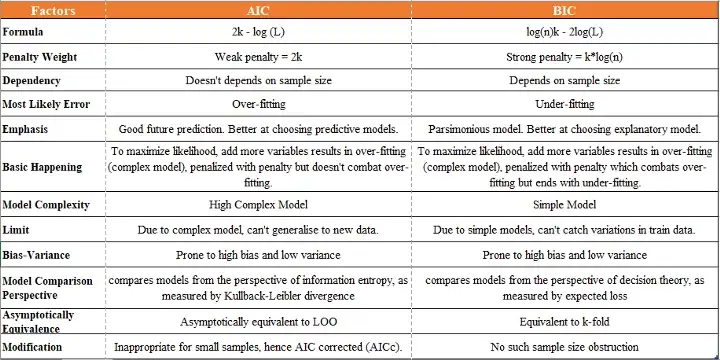

Statsmodels представляет возможность просто создавать специализированные графики отражающие различные аспекты статистического анализа.

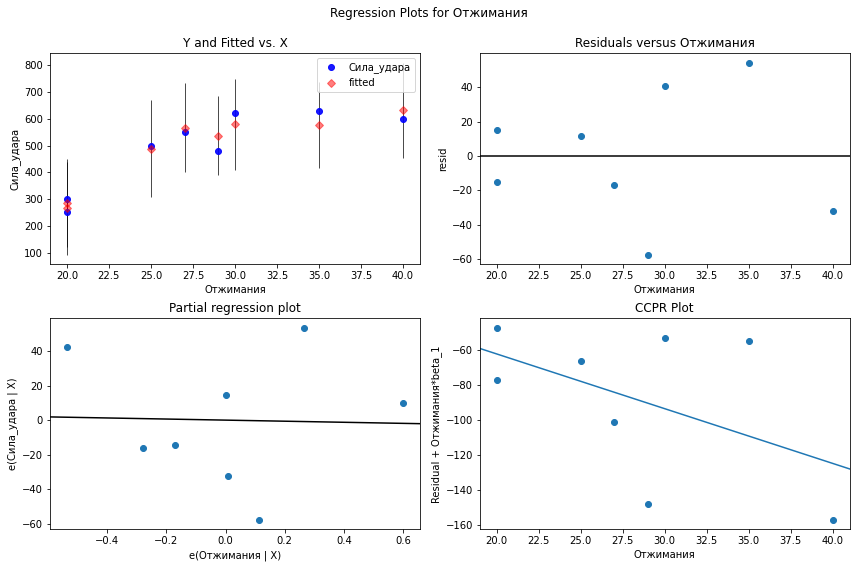

In [69]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lin_res, "Отжимания", fig=fig)

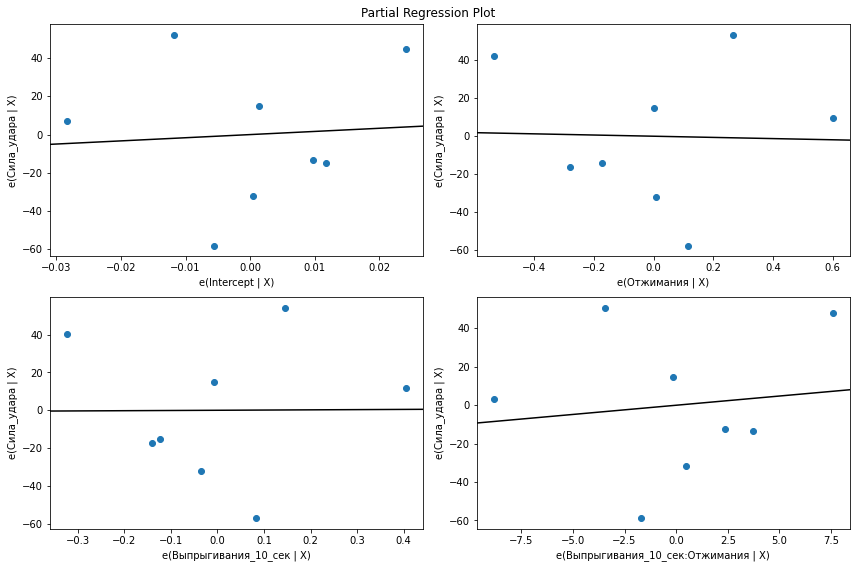

In [70]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lin_res, fig=fig)

In [6]:
from statsmodels.formula.api import logit

In [40]:
log_res = logit(
    "Результат ~  Отжимания", df
).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.314456
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Результат   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.5463
Time:                        15:57:21   Log-Likelihood:                -2.5156
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                   0.01384
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7514     12.687      1.242      0.214      -9.114      40.617
Отжимания     -0.5664      0.

In [42]:
new_data = {
    'Выпрыгивания_10_сек': [17, 16, 12, 18],
    'Отжимания': [30, 29, 20, 28]
}

test_res =  ['сильно', 'сильно', 'слабо', 'слабо']

In [53]:
log_res.pred_table()

array([[3., 1.],
       [1., 3.]])

Возможно вычислять различные дифференциалы -  Marginal effects

In [63]:
mfx = log_res.get_margeff( method= 'eydx')
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:              Результат
Method:                          eydx
At:                           overall
            d(lny)/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Отжимания     -0.2832      0.236     -1.200      0.230      -0.746       0.179
